___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [11]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

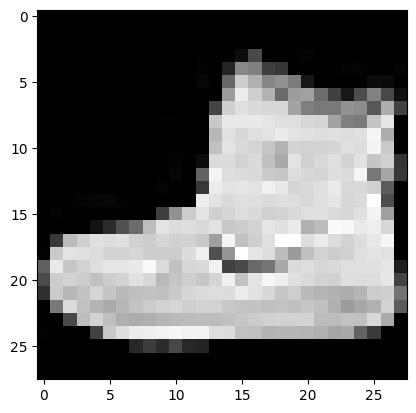

In [13]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [15]:
y_train.shape, y_test.shape

((60000,), (10000,))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:
x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
from keras.utils import to_categorical

# Number of classes
num_classes = len(classes)
# Converting
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)


In [25]:
y_train_one_hot, y_test_one_hot

(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Training with Early Stopping
history = model.fit(x_train, y_train_one_hot,
                    epochs=20,  # You can adjust the number of epochs
                    validation_split=0.2,  # Splitting a portion for validation
                    callbacks=[early_stopping])


Epoch 1/20
1500/1500 [==============================] - 16s 5ms/step - loss: 0.4101 - accuracy: 0.8567 - val_loss: 0.2936 - val_accuracy: 0.8947
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2650 - accuracy: 0.9045 - val_loss: 0.2976 - val_accuracy: 0.8941
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2196 - accuracy: 0.9200 - val_loss: 0.2655 - val_accuracy: 0.9045
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1872 - accuracy: 0.9326 - val_loss: 0.2563 - val_accuracy: 0.9093
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1612 - accuracy: 0.9424 - val_loss: 0.2773 - val_accuracy: 0.9108
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1393 - accuracy: 0.9499 - val_loss: 0.2664 - val_accuracy: 0.9098
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1201 - accuracy: 0.9572 - val_loss: 0.3045 - val_accuracy

**TASK 7: Plot values of metrics you used in your model.**

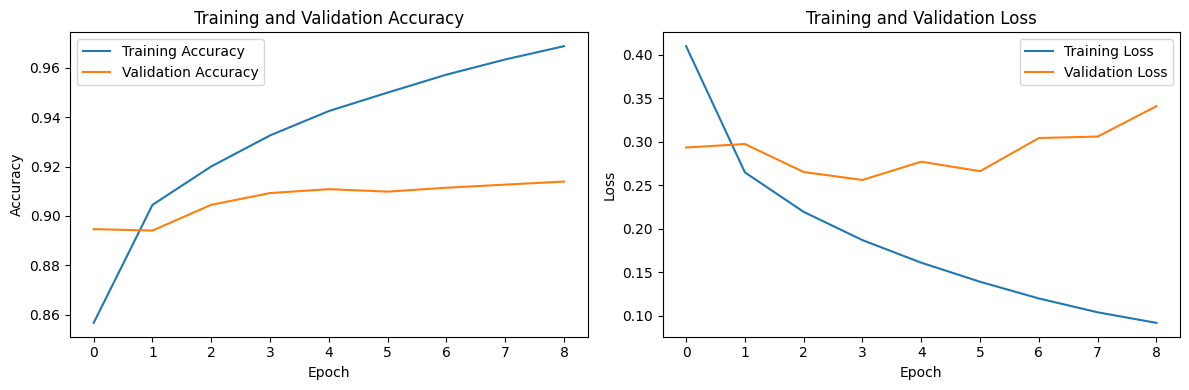

In [28]:
import matplotlib.pyplot as plt

training_history = history.history

# Training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history['accuracy'], label='Training Accuracy')
plt.plot(training_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training vs Validation Loss Curve
plt.subplot(1, 2, 2)
plt.plot(training_history['loss'], label='Training Loss')
plt.plot(training_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [29]:
from sklearn.metrics import classification_report

# Use the trained model
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions
y_pred_classes = y_pred.argmax(axis=-1)

# Convert one-hot encoded true labels to class labels
y_true_classes = y_test_one_hot.argmax(axis=-1)

# Classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])

print(report)


313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.86      0.85      1000
       Dress       0.94      0.88      0.91      1000
        Coat       0.84      0.89      0.87      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.75      0.77      0.76      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

## Prediction

1/1 [==============================] - 0s 94ms/step


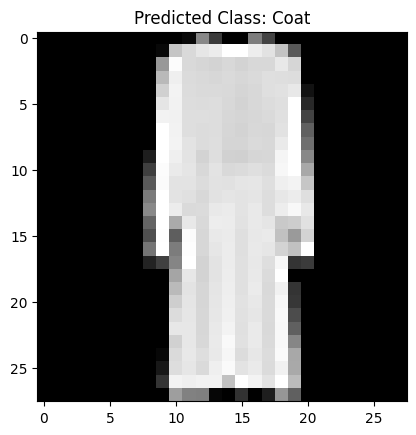

In [41]:
import random
import numpy as np
# Select a random image from x_test
index = random.randint(0, x_test.shape[0] - 1)
image = x_test[index]

# Reshape the image to match the input shape of the model (28x28 pixels with a single channel)
image = np.expand_dims(image, axis=0)

# Make a prediction on the selected image
prediction = model.predict(image)

# Get the predicted class label (0 to 9)
predicted_class = prediction.argmax()

# If you have a list of class names, you can get the class name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predicted_class_name = class_names[predicted_class]

# Display the image and the prediction
plt.figure()
plt.imshow(image[0, :, :, 0], cmap='gray')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()





In [47]:
predicted_class_name

'Coat'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___